In [1]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

TensorFlow 2.x selected.


In [0]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
maxlen = 200

In [0]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [0]:
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(LSTM(32, recurrent_dropout = 0.2))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/15
22500/22500 [==============================] - 64s 3ms/sample - loss: 0.6122 - accuracy: 0.6965 - val_loss: 0.4535 - val_accuracy: 0.8036
Epoch 2/15
22500/22500 [==============================] - 60s 3ms/sample - loss: 0.4262 - accuracy: 0.8216 - val_loss: 0.3903 - val_accuracy: 0.8260
Epoch 3/15
22500/22500 [==============================] - 64s 3ms/sample - loss: 0.3350 - accuracy: 0.8663 - val_loss: 0.3690 - val_accuracy: 0.8352
Epoch 4/15
22500/22500 [==============================] - 63s 3ms/sample - loss: 0.2916 - accuracy: 0.8839 - val_loss: 0.3965 - val_accuracy: 0.8240
Epoch 5/15
22500/22500 [==============================] - 61s 3ms/sample - loss: 0.2626 - accuracy: 0.9004 - val_loss: 0.3805 - val_accuracy: 0.8332
Epoch 6/15
22500/22500 [==============================] - 63s 3ms/sample - loss: 0.2353 - accuracy: 0.9116 - val_loss: 0.3887 - val_accuracy: 0.8344
Epoch 7/15
22500/22500 [==============================] -

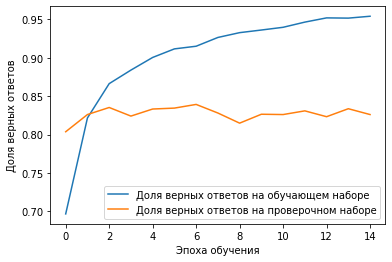

In [10]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [11]:
scores = model.evaluate(x_test, y_test, verbose=1)

25000/25000 [==============================] - 50s 2ms/sample - loss: 0.5289 - accuracy: 0.8175
